In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import math

import sys
sys.setrecursionlimit(5000)

In [ ]:
observs = pd.read_csv("Data/tuftit/2019_ebd_tuftit_Feb-2024_secondclean.csv")
print(observs.head(10))

   YEAR  MONTH  DAY  LATITUDE  LONGITUDE   INDEX  OBSERVATION COUNT  IBA CODE  \
0  2019      1    1      28.0      -97.0  659966                  4      True   
1  2019      1    1      28.0      -97.0  659968                  9     False   
2  2019      1    1      28.0      -97.0  660000                 50     False   
3  2019      1    1      28.0      -97.0  660005                  5     False   
4  2019      1    1      28.0      -97.0  848143                  2      True   
5  2019      1    1      28.0      -97.0  848149                 16      True   
6  2019      1    1      28.0      -96.0  660307                  6     False   
7  2019      1    1      28.0      -96.0  660358                  4     False   
8  2019      1    1      28.0      -83.0  132784                  1     False   
9  2019      1    1      28.0      -83.0  132786                  1     False   

   BCR CODE  USFWS CODE OBSERVATION DATE  DURATION MINUTES  COUNT  
0      True        True       2019-01-01

In [ ]:
aggregate = pd.read_csv("Data/tuftit/2019_ebd_tuftit_Feb-2024_aggregate.csv")
print(aggregate.head(10))

   YEAR  MONTH  DAY  LATITUDE  LONGITUDE  OBSERVATION COUNT  IBA CODE  \
0  2019      1    1      28.0      -83.0                 67         0   
1  2019      1    1      28.0      -82.0                 60         1   
2  2019      1    1      28.0      -81.0                 10         6   
3  2019      1    1      29.0      -97.0                  4         0   
4  2019      1    1      29.0      -96.0                 42         0   
5  2019      1    1      29.0      -95.0                  9         0   
6  2019      1    1      29.0      -94.0                  1         0   
7  2019      1    1      29.0      -85.0                  1         0   
8  2019      1    1      29.0      -84.0                  3         0   
9  2019      1    1      29.0      -83.0                106         1   

   BCR CODE  USFWS CODE  DURATION MINUTES  COUNT  
0        25           0            2078.0   27.0  
1        29           0            3102.0   29.0  
2         9           1             795.0  

In [ ]:
weather = pd.read_csv("Data/weather_2019.txt")
print(weather.head(15))

    YEAR  MONTH  DAY  LATITUDE  LONGITUDE   PRCP  PRCP_CNT  SNOW  SNOW_CNT  \
0   2019      1    1      28.0      -97.0   87.0      15.0   0.0       6.0   
1   2019      1    1      28.0      -96.0   13.0       3.0   0.0       2.0   
2   2019      1    1      28.0      -83.0    0.0      66.0   0.0      48.0   
3   2019      1    1      28.0      -82.0    8.0      62.0   0.0      41.0   
4   2019      1    1      28.0      -81.0   16.0      32.0   0.0      18.0   
5   2019      1    1      29.0      -97.0   39.0      28.0   0.0      15.0   
6   2019      1    1      29.0      -96.0  443.0      57.0   0.0      21.0   
7   2019      1    1      29.0      -95.0  169.0      14.0   0.0       1.0   
8   2019      1    1      29.0      -94.0  152.0       3.0   NaN       0.0   
9   2019      1    1      29.0      -93.0  449.0       6.0   NaN       0.0   
10  2019      1    1      29.0      -92.0   89.0       4.0   NaN       0.0   
11  2019      1    1      29.0      -91.0  952.0      11.0   0.0

In [ ]:
agg1 = pd.merge(aggregate, weather, how="left", on=['YEAR', 'MONTH', 'DAY', 'LATITUDE', 'LONGITUDE']).set_index(['YEAR', 'MONTH', 'DAY', 'LATITUDE', 'LONGITUDE'])
obs1= pd.merge(observs, weather, how="left", on=['YEAR', 'MONTH', 'DAY', 'LATITUDE', 'LONGITUDE']).drop(['INDEX'], axis =1)

print(agg1.info())
print(agg1.head(10))


print(obs1.info())
print(obs1.head(10))

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 87301 entries, (2019, 1, 1, 28.0, -83.0) to (2019, 12, 31, 45.0, -73.0)
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OBSERVATION COUNT  87301 non-null  int64  
 1   IBA CODE           87301 non-null  int64  
 2   BCR CODE           87301 non-null  int64  
 3   USFWS CODE         87301 non-null  int64  
 4   DURATION MINUTES   87301 non-null  float64
 5   COUNT              87301 non-null  float64
 6   PRCP               87229 non-null  float64
 7   PRCP_CNT           87249 non-null  float64
 8   SNOW               86466 non-null  float64
 9   SNOW_CNT           87220 non-null  float64
 10  SNWD               82726 non-null  float64
 11  SNWD_CNT           87146 non-null  float64
 12  TMAX               87075 non-null  float64
 13  TMAX_CNT           87139 non-null  float64
 14  TMIN               87069 non-null  float64
 15  TMIN_CNT           87139

In [ ]:
agg2 = agg1.dropna()
agg2.loc[:,'OBSERVATION COUNT'] = agg2['OBSERVATION COUNT']/ agg2['COUNT']
agg2.loc[:,'IBA CODE'] = agg2['IBA CODE']/ agg2['COUNT']
agg2.loc[:,'BCR CODE'] = agg2['BCR CODE']/ agg2['COUNT']
agg2.loc[:,'USFWS CODE'] = agg2['USFWS CODE']/ agg2['COUNT']
agg2.loc[:,'DURATION MINUTES'] = agg2['DURATION MINUTES']/ agg2['COUNT']
agg2.loc[:,'PRCP'] = agg2['PRCP']/ agg2['PRCP_CNT']
agg2.loc[:,'SNOW'] = agg2['SNOW']/ agg2['SNOW_CNT']
agg2.loc[:,'SNWD'] = agg2['SNWD']/ agg2['SNWD_CNT']
agg2.loc[:,'TMAX'] = agg2['TMAX']/ agg2['TMAX_CNT']
agg2.loc[:,'TMIN'] = agg2['TMIN']/ agg2['TMIN_CNT']

agg3 = agg2.drop(['COUNT', 'PRCP_CNT', 'SNOW_CNT', 'SNWD_CNT', 'TMAX_CNT', 'TMIN_CNT'], axis = 1)


print(agg3.head(10))


obs2 = obs1.dropna()
obs2.loc[:,'PRCP'] = obs2['PRCP']/ obs2['PRCP_CNT']
obs2.loc[:,'SNOW'] = obs2['SNOW']/ obs2['SNOW_CNT']
obs2.loc[:,'SNWD'] = obs2['SNWD']/ obs2['SNWD_CNT']
obs2.loc[:,'TMAX'] = obs2['TMAX']/ obs2['TMAX_CNT']
obs2.loc[:,'TMIN'] = obs2['TMIN']/ obs2['TMIN_CNT']

obs3 = obs2.drop(['COUNT', 'OBSERVATION DATE', 'PRCP_CNT', 'SNOW_CNT', 'SNWD_CNT', 'TMAX_CNT', 'TMIN_CNT'], axis = 1)

print(obs3.head(10))

/var/folders/nn/jp40594969q555pmf73r6mvr0000gn/T/ipykernel_53390/2880716703.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2.48148148 2.06896552 1.11111111 ... 3.         2.         1.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  agg2.loc[:,'OBSERVATION COUNT'] = agg2['OBSERVATION COUNT']/ agg2['COUNT']
/var/folders/nn/jp40594969q555pmf73r6mvr0000gn/T/ipykernel_53390/2880716703.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.03448276 0.66666667 ... 1.         0.         0.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  agg2.loc[:,'IBA CODE'] = agg2['IBA CODE']/ agg2['COUNT']
/var/folders/nn/jp40594969q555pmf73r6mvr0000gn/T/ipykernel_53390/2880716703.py:4: FutureWarning: Setting an item of incompatible dtype is deprec

                                   OBSERVATION COUNT  IBA CODE  BCR CODE  \
YEAR MONTH DAY LATITUDE LONGITUDE                                          
2019 1     1   28.0     -83.0               2.481481  0.000000  0.925926   
                        -82.0               2.068966  0.034483  1.000000   
                        -81.0               1.111111  0.666667  1.000000   
               29.0     -97.0               1.333333  0.000000  1.000000   
                        -96.0               2.000000  0.000000  1.000000   
                        -95.0               2.250000  0.000000  1.000000   
                        -84.0               3.000000  0.000000  1.000000   
                        -83.0               3.117647  0.029412  1.000000   
                        -82.0               1.916667  0.083333  1.000000   
               30.0     -97.0               1.600000  0.000000  1.000000   

                                   USFWS CODE  DURATION MINUTES       PRCP  \
YEAR MONT

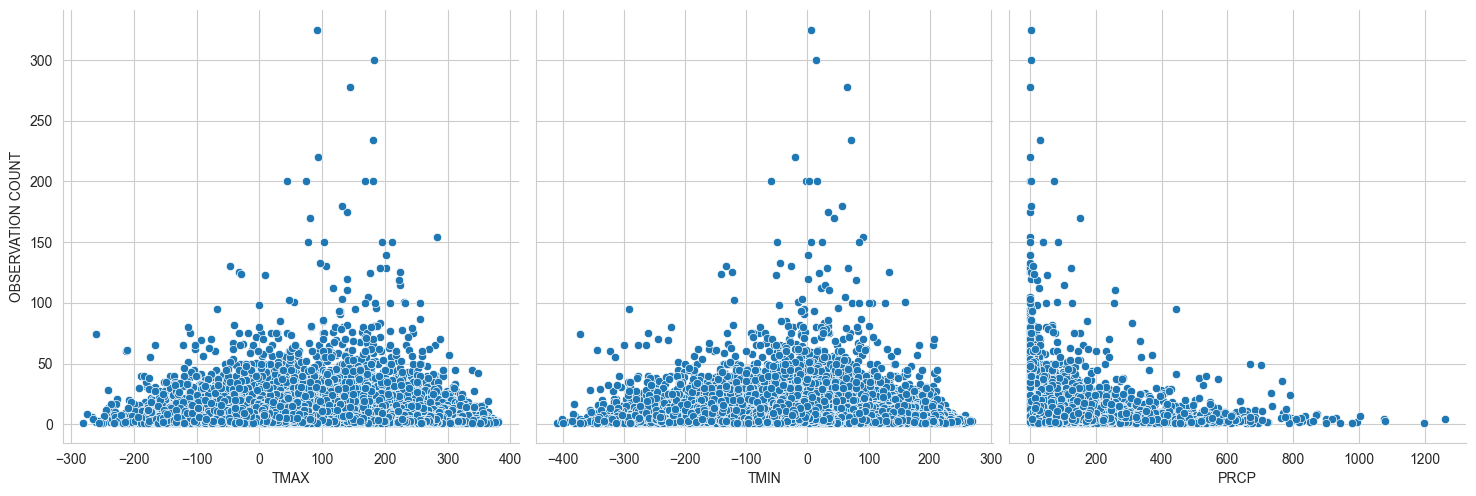

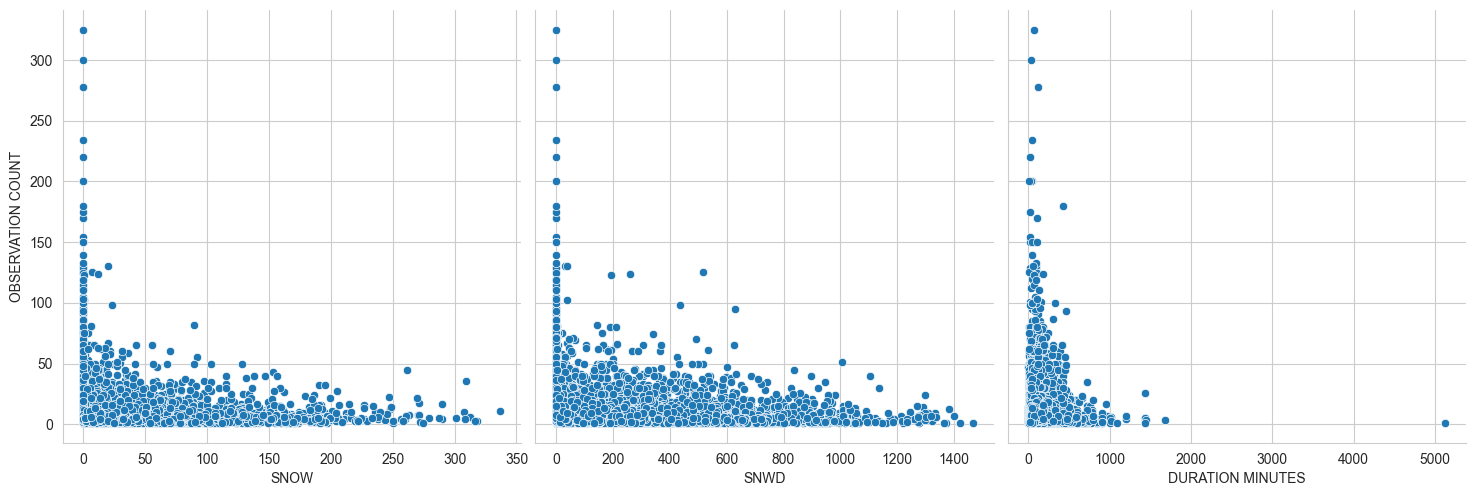

In [ ]:
sns.pairplot(agg3,
                y_vars = ['OBSERVATION COUNT'],
                x_vars = ['TMAX', 'TMIN', 'PRCP'],
                height = 5)
sns.pairplot(agg3,
                y_vars = ['OBSERVATION COUNT'],
                x_vars = ['SNOW', 'SNWD', 'DURATION MINUTES'],
                height = 5)


plt.show()

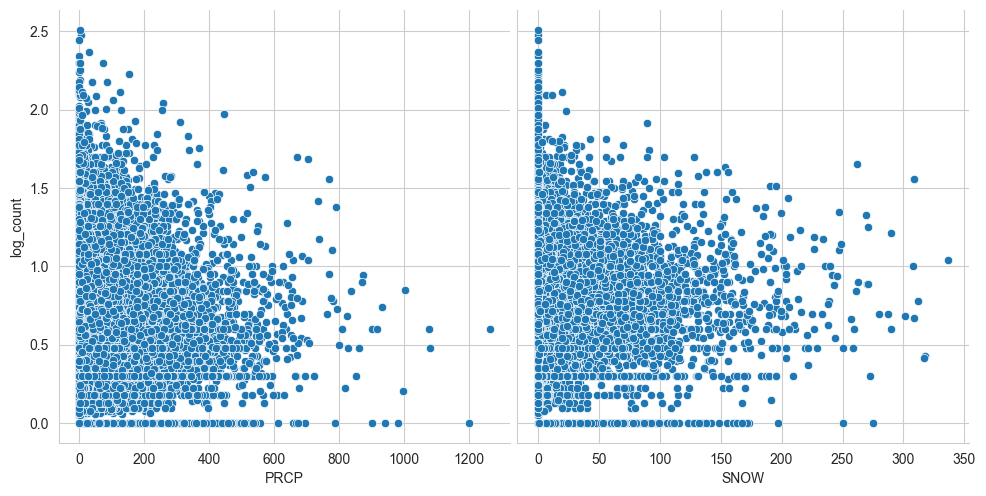

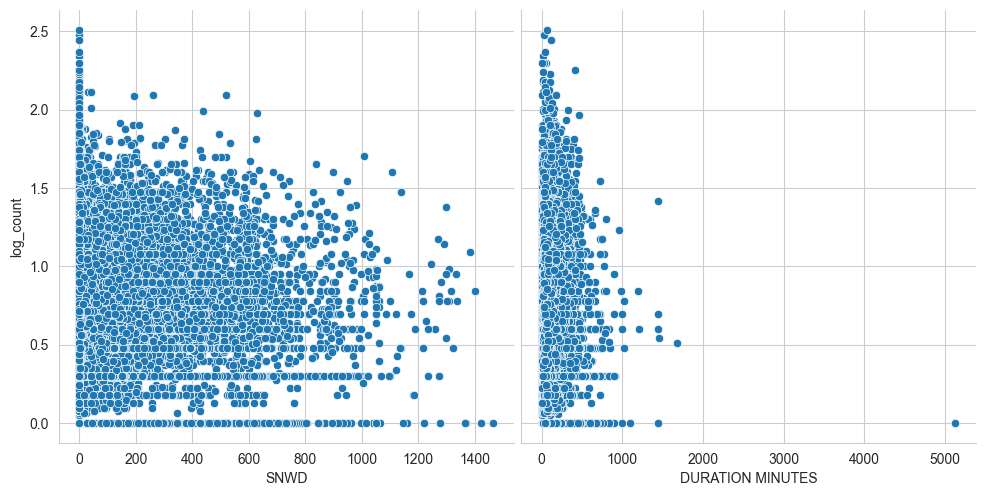

In [ ]:
agg3['log_count'] = np.log10(agg3['OBSERVATION COUNT'])

sns.pairplot(agg3,
                y_vars = ['log_count'],
                x_vars = ['PRCP','SNOW'],
                height = 5)

sns.pairplot(agg3,
                y_vars = ['log_count'],
                x_vars = ['SNWD', 'DURATION MINUTES'],
                height = 5)


plt.show()

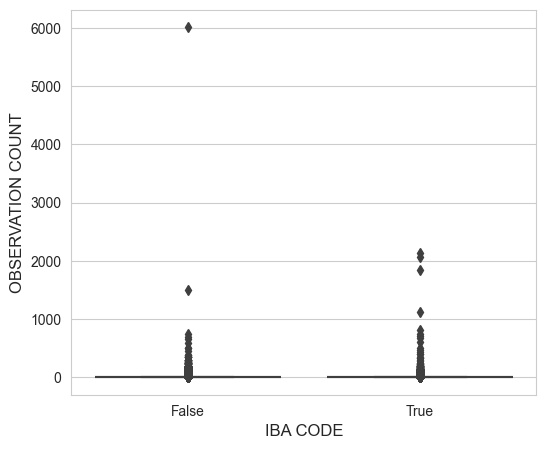

In [ ]:
plt.figure(figsize=(6,5))

sns.boxplot(data = obs3,
               y = 'OBSERVATION COUNT',
               x = 'IBA CODE')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("OBSERVATION COUNT", fontsize=12)
plt.xlabel("IBA CODE", fontsize=12)

plt.show()

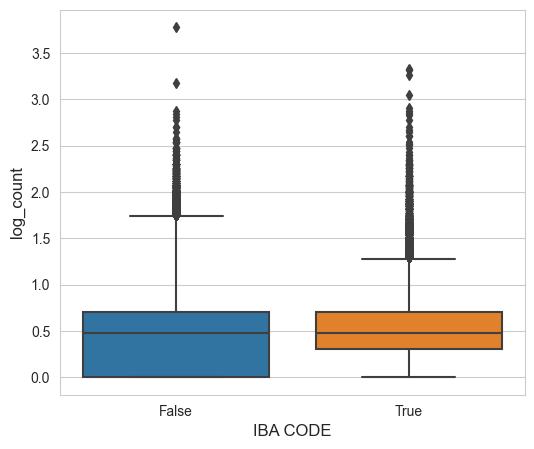

In [ ]:
obs3['log_count'] = np.log10(obs3['OBSERVATION COUNT'])

plt.figure(figsize=(6,5))

sns.boxplot(data = obs3,
               y = 'log_count',
               x = 'IBA CODE')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("log_count", fontsize=12)
plt.xlabel("IBA CODE", fontsize=12)

plt.show()

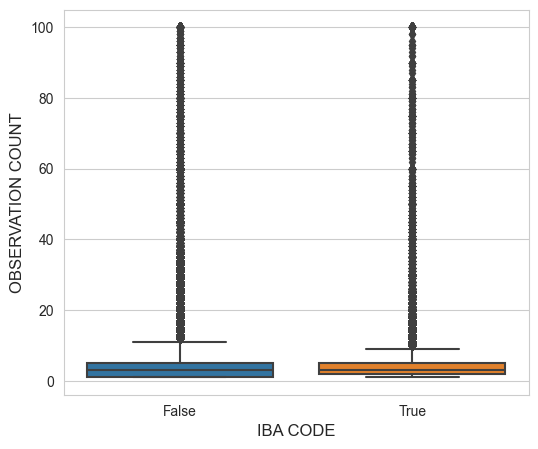

In [ ]:
obs4 = obs3[obs3['OBSERVATION COUNT'] <= 100]

plt.figure(figsize=(6,5))

sns.boxplot(data = obs4,
               y = 'OBSERVATION COUNT',
               x = 'IBA CODE')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("OBSERVATION COUNT", fontsize=12)
plt.xlabel("IBA CODE", fontsize=12)

plt.show()

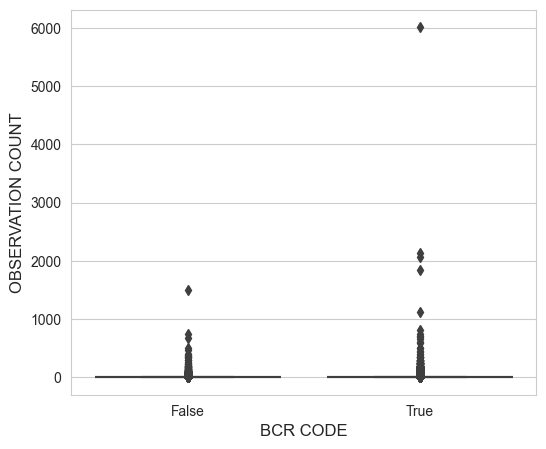

In [ ]:
plt.figure(figsize=(6,5))

sns.boxplot(data = obs3,
               y = 'OBSERVATION COUNT',
               x = 'BCR CODE')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("OBSERVATION COUNT", fontsize=12)
plt.xlabel("BCR CODE", fontsize=12)

plt.show()

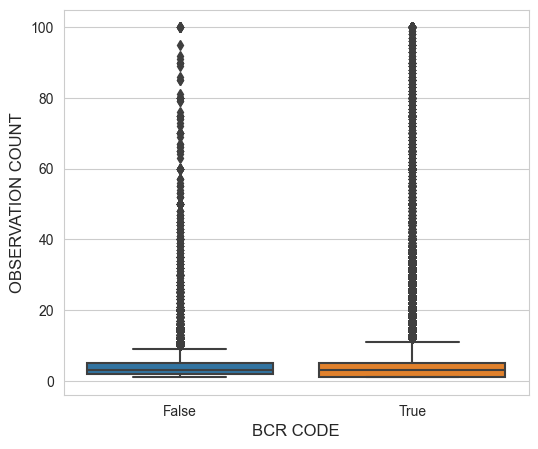

In [ ]:
plt.figure(figsize=(6,5))

sns.boxplot(data = obs4,
               y = 'OBSERVATION COUNT',
               x = 'BCR CODE')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("OBSERVATION COUNT", fontsize=12)
plt.xlabel("BCR CODE", fontsize=12)

plt.show()

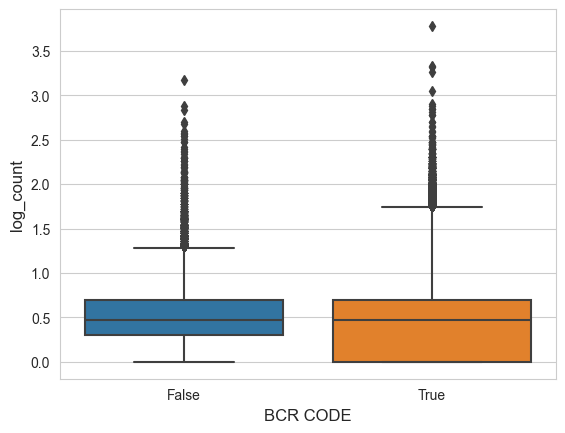

In [ ]:
sns.boxplot(data = obs3,
               y = 'log_count',
               x = 'BCR CODE')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("log_count", fontsize=12)
plt.xlabel("BCR CODE", fontsize=12)

plt.show()

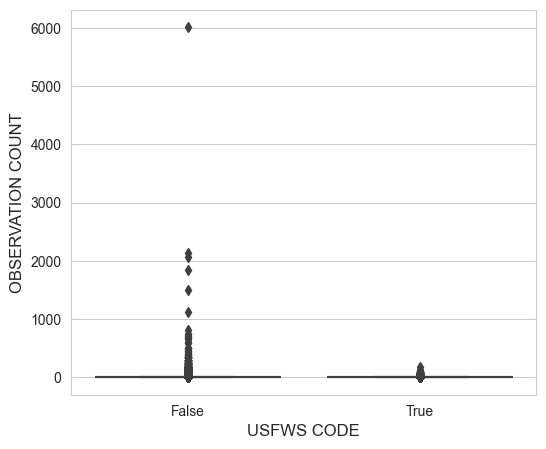

In [ ]:
plt.figure(figsize=(6,5))

sns.boxplot(data = obs3,
               y = 'OBSERVATION COUNT',
               x = 'USFWS CODE')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("OBSERVATION COUNT", fontsize=12)
plt.xlabel("USFWS CODE", fontsize=12)

plt.show()

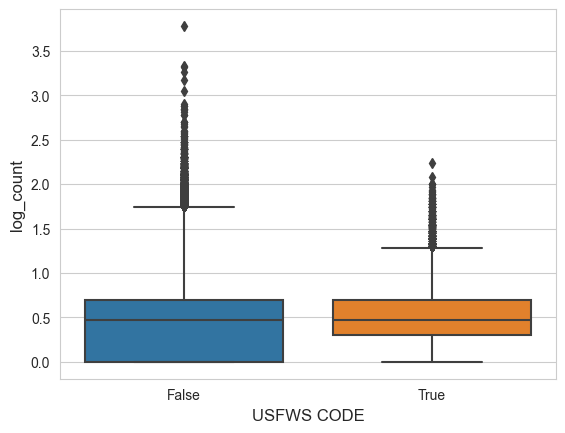

In [ ]:
sns.boxplot(data = obs3,
               y = 'log_count',
               x = 'USFWS CODE')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("log_count", fontsize=12)
plt.xlabel("USFWS CODE", fontsize=12)

plt.show()

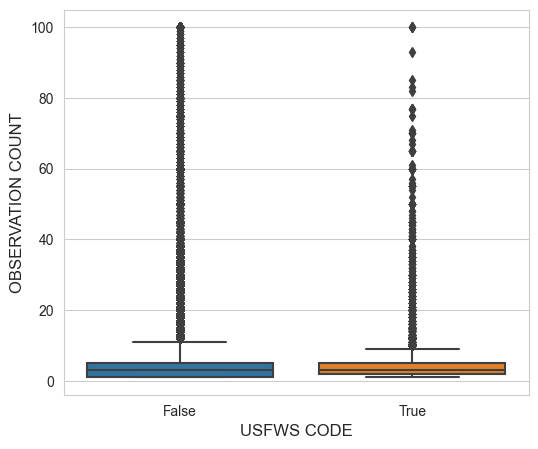

In [ ]:
plt.figure(figsize=(6,5))

sns.boxplot(data = obs4,
               y = 'OBSERVATION COUNT',
               x = 'USFWS CODE')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("OBSERVATION COUNT", fontsize=12)
plt.xlabel("USFWS CODE", fontsize=12)

plt.show()

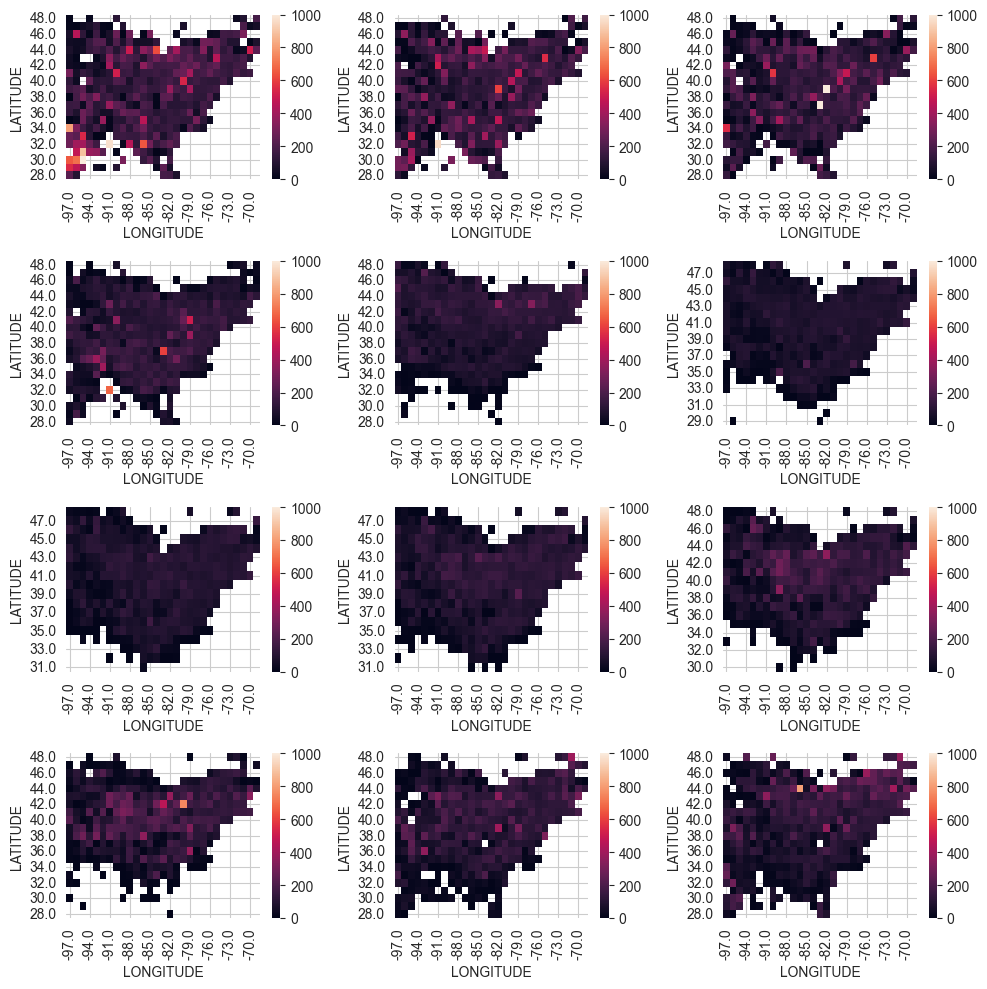

In [ ]:
pd.set_option('display.min_rows',100)
pd.set_option('display.max_rows',100)

fig, axes = plt.subplots(nrows=4,ncols=3,figsize=(10,10))

for i in range(1,13):
    cg = agg3
    cg = cg[cg.index.isin([2019], level="YEAR")]
    cg = cg[cg.index.isin([i], level="MONTH")]
    cg = cg.reset_index(level="LATITUDE").reset_index(level="LONGITUDE")

    cg = pd.pivot_table(cg,values='OBSERVATION COUNT',
                        index="LATITUDE",
                        columns="LONGITUDE",
                        aggfunc = 'sum')


    sns.heatmap(cg,ax=axes[math.floor((i-1)/3)][(i-1)%3],vmin=0,vmax=1000).invert_yaxis()
fig.tight_layout()


In [ ]:
agg2017 = pd.read_csv("Data/amegfi/2017_ebd_amegfi_Feb-2024_aggregate.csv")
agg2018 = pd.read_csv("Data/amegfi/2018_ebd_amegfi_Feb-2024_aggregate.csv")
agg2019 = pd.read_csv("Data/amegfi/2019_ebd_amegfi_Feb-2024_aggregate.csv")
agg2020 = pd.read_csv("Data/amegfi/2020_ebd_amegfi_Feb-2024_aggregate.csv")
agg2021 = pd.read_csv("Data/amegfi/2021_ebd_amegfi_Feb-2024_aggregate.csv")
agg2022 = pd.read_csv("Data/amegfi/2022_ebd_amegfi_Feb-2024_aggregate.csv")
agg2023 = pd.read_csv("Data/amegfi/2023_ebd_amegfi_Feb-2024_aggregate.csv")



t_agg = pd.concat([agg2017,agg2018,agg2019,agg2020,agg2021,agg2022,agg2023])
t_agg = t_agg.drop(['IBA CODE', 'BCR CODE', 'USFWS CODE'], axis=1)
t_agg.head(20)

,YEAR,MONTH,DAY,LATITUDE,LONGITUDE,OBSERVATION COUNT,DURATION MINUTES,COUNT
0,2017,1,1,28.0,-97.0,11,147.0,1.0
1,2017,1,1,28.0,-83.0,49,945.0,12.0
2,2017,1,1,28.0,-82.0,66,1412.0,18.0
3,2017,1,1,28.0,-81.0,21,590.0,5.0
4,2017,1,1,29.0,-97.0,20,600.0,1.0
5,2017,1,1,29.0,-96.0,115,4418.0,22.0
6,2017,1,1,29.0,-91.0,2,80.0,1.0
7,2017,1,1,29.0,-85.0,43,238.0,3.0
8,2017,1,1,29.0,-83.0,41,1298.0,12.0
9,2017,1,1,29.0,-82.0,9,235.0,5.0


In [ ]:
def is_in(sth, iterable):
    for item in iterable:
        if sth == item:
            return True
    return False

## Calculate n where (year, month, and day) is in the n-th week since January 1st 2017

def ds_since_2017(year, month, day):
    if (year < 2017) or (month < 1) or (day < 1):
        print(year)
        print(month)
        print(day)
        print('Error: wrong date')
        return None
    leap_year = False
    if year%4 == 0:
        leap_year = True
    if month == 1:
        return day + 365 * (year - 2017) + (year >= 2020)
    else:
        if is_in(month, [4,6,9,11]):
            return ds_since_2017(year, month-1, day+30)
        elif month == 2:
            return ds_since_2017(year, month-1, day+28+leap_year)
        else:
            return ds_since_2017(year, month-1, day+31)



t_agg['ds'] = t_agg.apply(lambda x: ds_since_2017(x['YEAR'], x['MONTH'],x['DAY']), axis=1)

print(t_agg.head(20))


    YEAR  MONTH  DAY  LATITUDE  LONGITUDE  OBSERVATION COUNT  \
0   2017      1    1      28.0      -97.0                 11   
1   2017      1    1      28.0      -83.0                 49   
2   2017      1    1      28.0      -82.0                 66   
3   2017      1    1      28.0      -81.0                 21   
4   2017      1    1      29.0      -97.0                 20   
5   2017      1    1      29.0      -96.0                115   
6   2017      1    1      29.0      -91.0                  2   
7   2017      1    1      29.0      -85.0                 43   
8   2017      1    1      29.0      -83.0                 41   
9   2017      1    1      29.0      -82.0                  9   
10  2017      1    1      30.0      -97.0                  1   
11  2017      1    1      30.0      -96.0                 48   
12  2017      1    1      30.0      -95.0                  2   
13  2017      1    1      30.0      -94.0                105   
14  2017      1    1      30.0      -93.

In [ ]:
t_agg_w = t_agg.drop(['YEAR', 'MONTH', 'DAY'], axis=1).groupby(['LATITUDE', 'LONGITUDE', 'ds']).sum()

max_week = int(t_agg['ds'].max())

## 28 <= Latitude <= 49 and -97 <= Longitude <= -68
tuples = []
for lat in range(22):
    for long in range(30):
        for week in range(max_week + 1):
            tuples.append((lat+28, long-97, week))


t_agg_w['AVGOBS'] = t_agg_w.apply(lambda x: x['OBSERVATION COUNT']/ x['COUNT'], axis=1)

mult_ind = pd.MultiIndex.from_tuples(tuples, names=["LATITUDE", "LONGITUDE", 'ds']f)

print(len(mult_ind))

s = pd.Series(np.zeros(22*30*(max_week+1)), index=mult_ind)

ts = pd.concat([s, t_agg_w['AVGOBS']], axis =1)

print(ts.head(20))

ts[ts.AVGOBS.isnull()] = 0

ts = ts.drop([0], axis = 1)

print(ts.head(20))

1687620
                         0  AVGOBS
LATITUDE LONGITUDE ds             
28       -97       0   0.0     NaN
                   1   0.0    11.0
                   2   0.0     NaN
                   3   0.0     NaN
                   4   0.0     6.0
                   5   0.0     NaN
                   6   0.0    30.0
                   7   0.0     NaN
                   8   0.0    25.0
                   9   0.0    23.0
                   10  0.0     NaN
                   11  0.0     NaN
                   12  0.0     NaN
                   13  0.0     NaN
                   14  0.0     3.0
                   15  0.0     NaN
                   16  0.0     NaN
                   17  0.0     NaN
                   18  0.0     NaN
                   19  0.0     NaN
                       AVGOBS
LATITUDE LONGITUDE ds        
28       -97       0      0.0
                   1     11.0
                   2      0.0
                   3      0.0
                   4      6.0
            

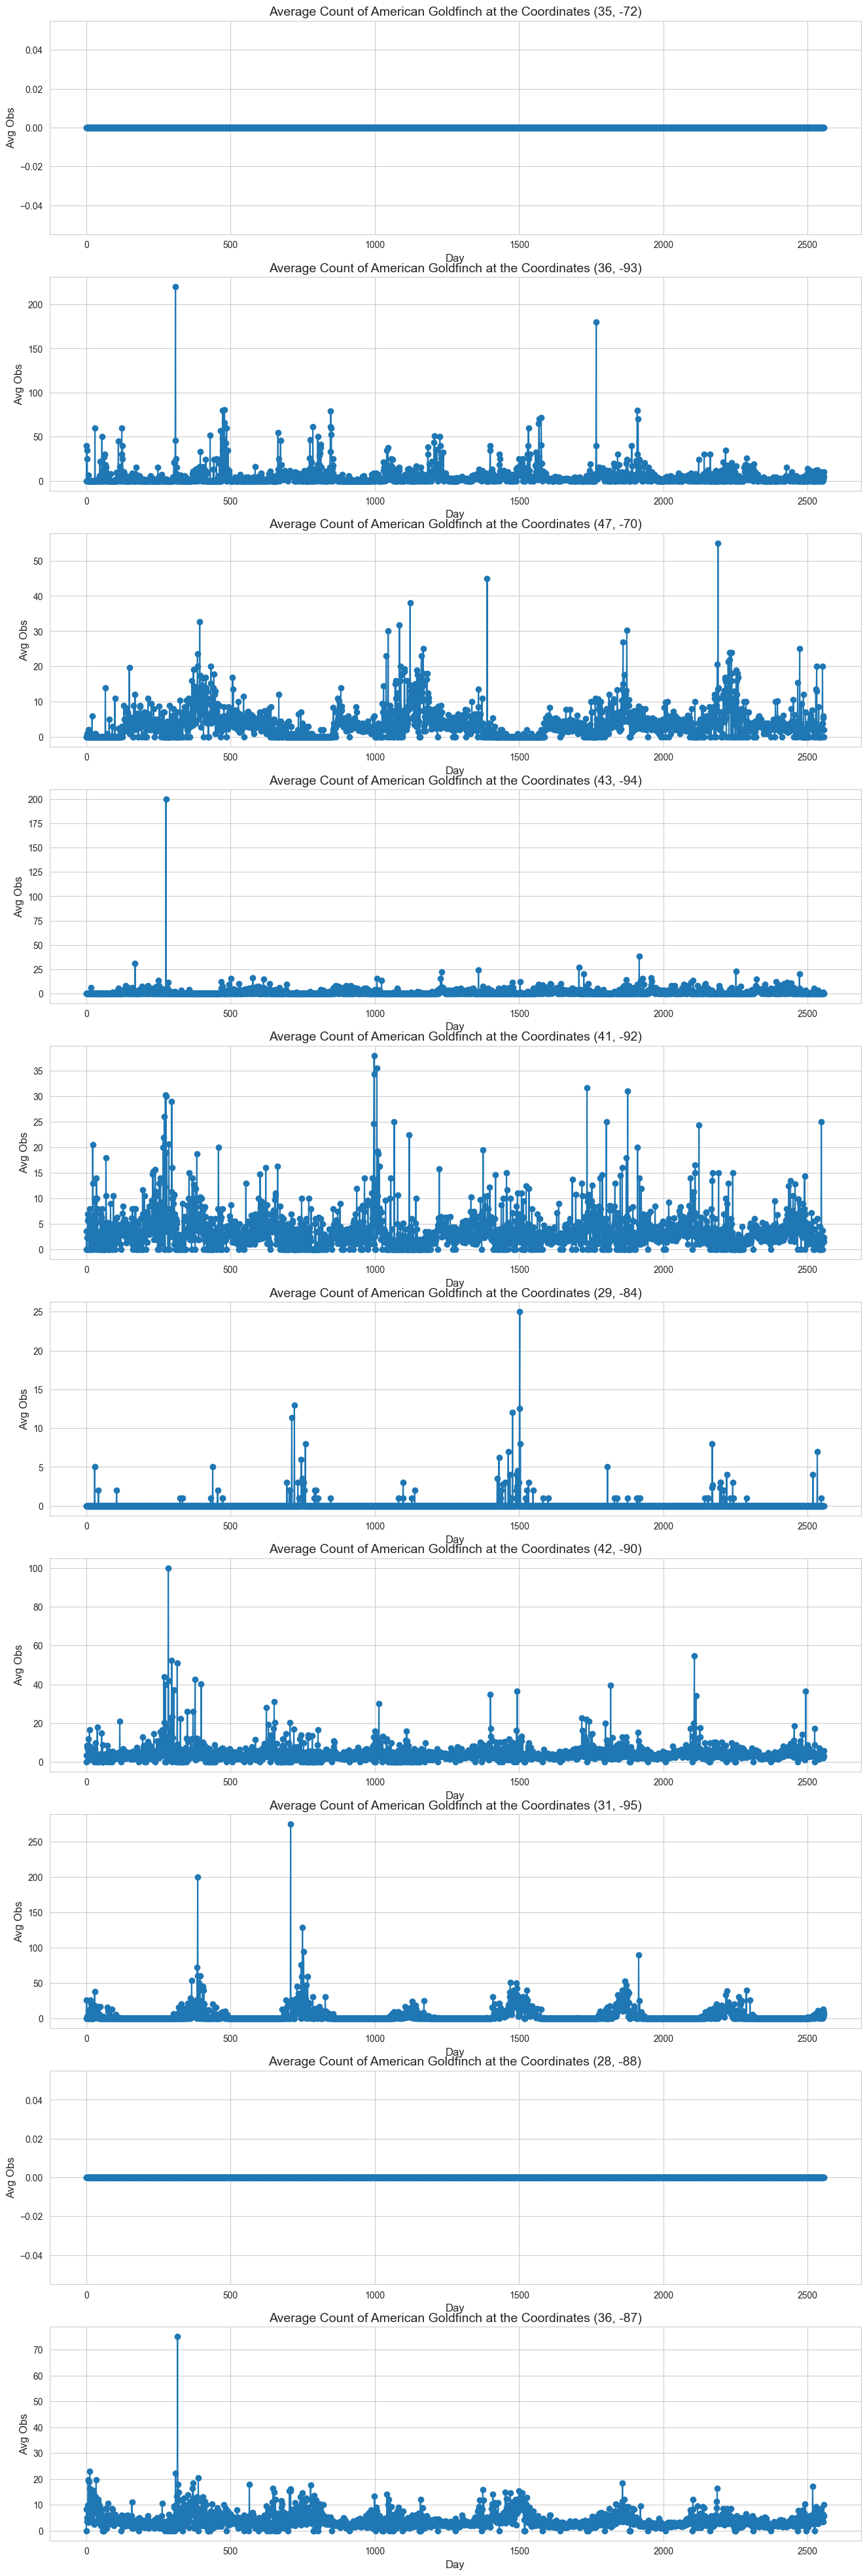

In [ ]:
fig,axes = plt.subplots(10,1,figsize=(16,50))

np.random.seed(1440)
rlats = np.random.randint(low = 28, high = 49, size= 10)
rlongs = np.random.randint(low = -97, high = -68, size= 10)

for i in range(10):
    axes[i].plot(np.arange(2557),
                    ts.loc[rlats[i],rlongs[i]].AVGOBS,
                    '-o')

    axes[i].set_xlabel("Day", fontsize=12)
    axes[i].set_ylabel("Avg Obs", fontsize=12)

    axes[i].set_title(f"Average Count of American Goldfinch at the Coordinates ({rlats[i]}, {rlongs[i]})", fontsize=14)

plt.show()

In [ ]:
import statsmodels.api as sm

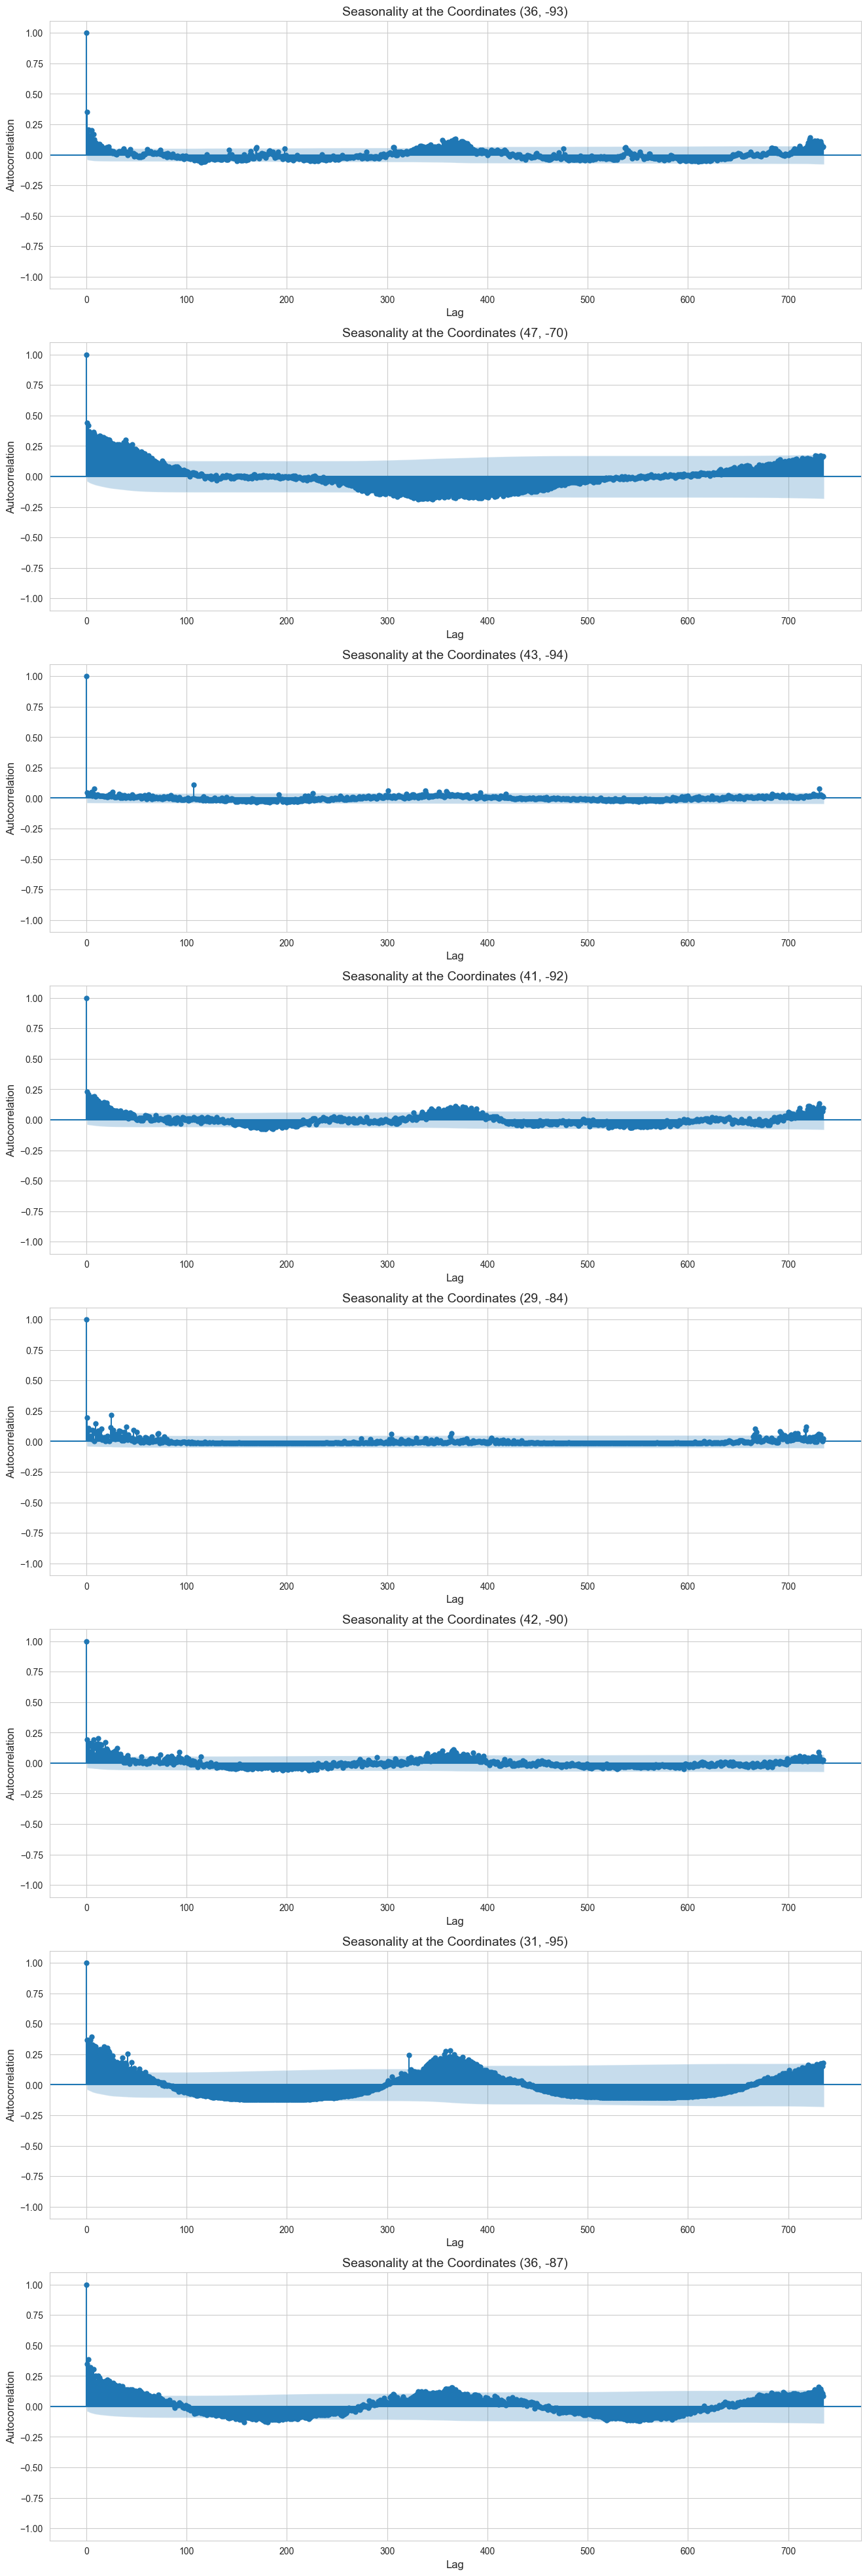

In [ ]:
## We test for seasonality here. It seems like the data is seasonal at most coordinates.

high_vol_inds = [1,2,3,4,5,6,7,9]

fig,axes = plt.subplots(8,1,figsize=(16,50))

for i in range(8):
    sm.graphics.tsa.plot_acf(ts.loc[rlats[high_vol_inds[i]],rlongs[high_vol_inds[i]]].AVGOBS,
                            lags=735,
                            ax=axes[i])
    axes[i].set_ylim(-1.1,1.1)


    axes[i].set_xlabel("Lag", fontsize=12)
    axes[i].set_ylabel("Autocorrelation", fontsize=12)

    axes[i].set_title(f"Seasonality at the Coordinates ({rlats[high_vol_inds[i]]}, {rlongs[high_vol_inds[i]]})", fontsize=14)

plt.show()

In [ ]:
f = open("Data/agg3_tuftit.txt", "a")
f.write(agg3.to_csv())
f.close()